In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [304]:
data = engine.execute("Select date from measurement order by date desc limit 1")
last_date = []
for i in data:
    last_date.append(i)
start_date = dt.date(2019, 11, 25)
end_date = dt.date(2019, 12, 2)

# The last date of the dataset
print(last_date[0][0])


2017-08-23


# Exploratory Climate Analysis

# Design a query to retrieve the last 12 months of precipitation data and plot the results

In [305]:

# Calculate the date 1 year ago from the last data point in the database
datediff = dt.datetime.strptime(last_date[0][0], "%Y-%m-%d") - dt.timedelta(days=366)

# Perform a query to retrieve the data and precipitation scores
query = session.query(Measurement).filter(Measurement.date >= datediff).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
id=[]
station=[]
date=[]
prcp=[]
tobs=[]
for val in query:
    id.append(val.id)
    station.append(val.station)
    date.append(val.date)
    prcp.append(val.prcp)
    tobs.append(val.tobs)
    
df = pd.DataFrame({'id':id,'station':station,'date':date,'prcp':prcp,'tobs':tobs})
df.head()


,id,station,date,prcp,tobs
0,2364,USC00519397,2016-08-23,0.00,81.0
1,2365,USC00519397,2016-08-24,0.08,79.0
2,2366,USC00519397,2016-08-25,0.08,80.0
3,2367,USC00519397,2016-08-26,0.00,79.0
4,2368,USC00519397,2016-08-27,0.00,77.0


In [306]:
# Sort the dataframe by date
ar = df
ar.set_index('date', inplace=True)

ar = ar.sort_values(['date'],ascending=True)
ar.head(10)

,id,station,prcp,tobs
date,,,,
2016-08-23,2364,USC00519397,0.00,81.0
2016-08-23,8825,USC00517948,NaN,80.0
2016-08-23,14608,USC00519281,1.79,77.0
2016-08-23,7331,USC00514830,0.05,80.0
2016-08-23,5091,USC00513117,0.15,76.0
2016-08-23,19202,USC00516128,0.70,74.0
2016-08-23,11851,USC00519523,0.02,80.0
2016-08-24,2365,USC00519397,0.08,79.0
2016-08-24,14609,USC00519281,2.15,77.0


# Which day had the max Precipitation? 

In [307]:
# Find Max Precipitation date

a = pd.DataFrame(ar)
max_prcp = a.sort_values('prcp',ascending=False).head(1)
max_prcpval = max_prcp
max_prcpval = max_prcp.reset_index()
#Max Value
max_prcpval.iloc[0,0]

'2016-09-14'

# Plotting Precipitation data for last 12 months 

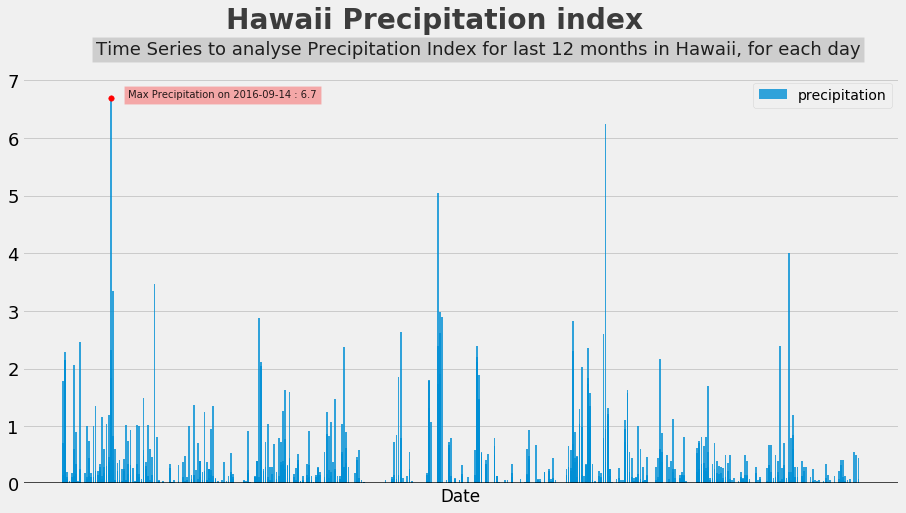

In [308]:
# Use Pandas Plotting with Matplotlib to plot the data
from matplotlib import style
style.use('fivethirtyeight')
plt.figure(figsize=(14,7))
plt.subplot()
plt.bar(ar.index,ar['prcp'],label='precipitation',alpha=0.8)
plt.xlabel('Date')
plt.legend()
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.xticks([])
plt.text(x = 75, y = 7.90, s = "Hawaii Precipitation index",
               fontsize = 28, weight = 'bold', alpha = .75)
plt.text(x = 15, y = 7.45,
               s = 'Time Series to analyse Precipitation Index for last 12 months in Hawaii, for each day',
              fontsize = 18, alpha = .85,bbox=dict(facecolor='gray', alpha=0.3))
plt.text(x = 30, y = max_prcpval.iloc[0,3],
               s = "Max Precipitation on " + max_prcpval.iloc[0,0] + " : " + str(max_prcpval.iloc[0,3]),
              fontsize = 10, alpha = .85,bbox=dict(facecolor='red', alpha=0.3))
plt.axhline(y = 0.005, color = 'black', linewidth = 5, alpha = .7,)


plt.scatter(max_prcpval['date'], max_prcpval['prcp'],marker='o',s=30, color="red",zorder=5)
plt.savefig("Images/Precipitation_last_12_months.png")
plt.show()

In [126]:
# Use Pandas to calcualte the summary statistics for the precipitation data
pd.DataFrame(df['prcp'].describe())

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

# Design a query to show how many stations are available in this dataset?
id_s = []
stations_s = []
name_s=[]
latitude_s=[]
longitude_s=[]
elevation_s=[]

data1 = engine.execute("Select * from station")
for i in data1:
    id_s.append(i.id)
    stations_s.append(i.station)
    name_s.append(i.name)
    latitude_s.append(i.latitude)
    longitude_s.append(i.longitude)
    elevation_s.append(i.elevation)
    
# Create a data frame for Stations
df_station = pd.DataFrame({'id':id_s,'station':stations_s,'name':name_s,'latitude':latitude_s,'elevation':elevation_s})
df_station

In [233]:
# Design a query to show how many stations are available in this dataset?
total_stations = session.query(Measurement.station).distinct().count()
print("Total Stations in the dataset: " + str(total_stations))

Total Stations in the dataset: 9


In [327]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

most_active_stations = session.query(Measurement.station, 
                                func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
print("Most Active Stations by count(descending order) - ")
for i in most_active_stations:
    print(i)

Most Active Stations by count(descending order) - 
('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [328]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

temp_recorded = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),
                                  func.avg(Measurement.tobs)).filter(Measurement.station == most_active_stations[0][0]).all()

print("Temperature recorded for Most Active Station: " + str(most_active_stations[0][0]))
print(f"Low: {temp_recorded[0][0]}")
print(f"High: {temp_recorded[0][1]}" )
print(f"Average: {round(temp_recorded[0][2], 1)}")

Temperature recorded for Most Active Station: USC00519281
Low: 54.0
High: 85.0
Average: 71.7


In [1]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [16]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [17]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


62.0 68.36585365853658 74.0


<IPython.core.display.Javascript object>


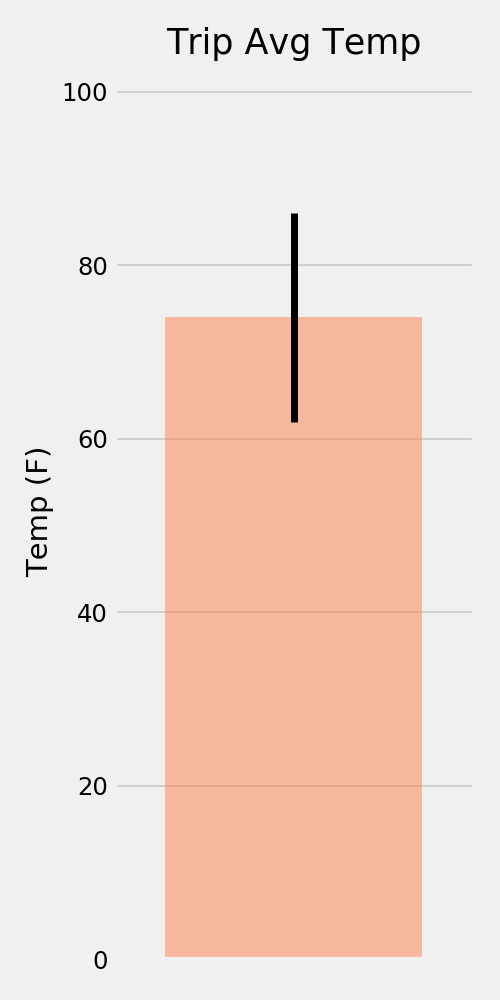

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [19]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


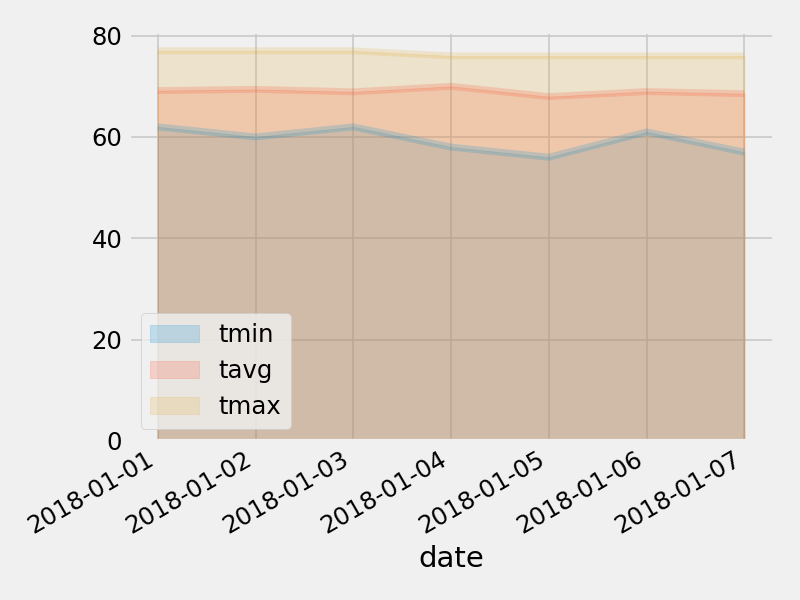

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
